In [1]:
import requests
import bs4
from bs4 import BeautifulSoup

In [8]:
#고양이  
import json
from pprint import pprint

base_url= 'https://www.pimfyvirus.com/dataurl_action/homeprotectionlist02/p=/search/02/p={}//'
# print(type(base_url))


req_header = {
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36",
    "X-Requested-With": "XMLHttpRequest" #파일구조가 Json이라 필요 
}

cat_data_list = list()

for  i in range(1,20): #페이지 범위 
    url=base_url.format(i)
    #network에서 응답이 post로 처리하게 되어있음 
    res=requests.post(url,headers=req_header)

    

    if(res.ok):
        # print(res.url)
        data = res.json()
        
        for item in data.get('lst',[]):
            cat_data_dict = dict()
            
            link = item['wish']
            cat_id = link.strip('/').split('/')[-1]     
            tags=item['tag']  
            breed = item['info23']
            date = item['info2']
            t2 = item['t2']

            parts = t2.split("/")
            name = parts[0] 
            gender = parts[1] 
            weight = parts[2] 

            #dict 저장 
            cat_data_dict['ID']= cat_id
            cat_data_dict['tags']= tags
            cat_data_dict['이름']= name
            cat_data_dict['성별']= gender
            cat_data_dict['몸무게']= weight
            cat_data_dict['종']= breed
            cat_data_dict['공고날짜 ']= date
            
            cat_data_list.append(cat_data_dict)                 
    else:
        print(f'Error Code = {res.status_code}') 


print(len(cat_data_list))
pprint(cat_data_list) 

205
[{'ID': '2950',
  'tags': ['임보가능', '입양전제'],
  '공고날짜 ': '2025-07-26',
  '몸무게': '1kg',
  '성별': '여',
  '이름': '나기 외 새끼고양이',
  '종': '믹스'},
 {'ID': '2927',
  'tags': ['임보가능', '입양전제'],
  '공고날짜 ': '2025-07-21',
  '몸무게': '08kg',
  '성별': '여',
  '이름': '달봉이',
  '종': '믹스'},
 {'ID': '2897',
  'tags': ['임보중', '입양전제'],
  '공고날짜 ': '2025-07-16',
  '몸무게': '3kg',
  '성별': '여',
  '이름': '콩이',
  '종': '믹스'},
 {'ID': '2893',
  'tags': ['임보중', '입양전제'],
  '공고날짜 ': '2025-07-15',
  '몸무게': '4kg',
  '성별': '남',
  '이름': '로담',
  '종': '품종'},
 {'ID': '2860',
  'tags': ['임보중', '입양전제'],
  '공고날짜 ': '2025-07-10',
  '몸무게': '06kg',
  '성별': '여',
  '이름': '로아',
  '종': '믹스'},
 {'ID': '2851',
  'tags': ['임보가능', '입양전제'],
  '공고날짜 ': '2025-07-09',
  '몸무게': '08kg',
  '성별': '남',
  '이름': '흑미',
  '종': '믹스'},
 {'ID': '2840',
  'tags': ['임보중', '입양전제'],
  '공고날짜 ': '2025-07-08',
  '몸무게': '1kg',
  '성별': '남',
  '이름': '방울이',
  '종': '믹스'},
 {'ID': '2839',
  'tags': ['임보중', '입양전제'],
  '공고날짜 ': '2025-07-08',
  '몸무게': '1kg',
  '성별': '남',
  '이름': 

In [9]:
import json 

with open('data/cat_data.json','w',encoding='utf-8') as file:
    json.dump(cat_data_list, file,ensure_ascii=False)

In [6]:
import pandas as pd

cat_df = pd.read_json('data/cat_data.json')
print(type(cat_df))
cat_df.head()

<class 'pandas.core.frame.DataFrame'>


,ID,tags,이름,성별,몸무게,종,공고날짜
0,2950,"[임보가능, 입양전제]",나기 외 새끼고양이,여,1kg,믹스,2025-07-26
1,2927,"[임보가능, 입양전제]",달봉이,여,08kg,믹스,2025-07-21
2,2897,"[임보중, 입양전제]",콩이,여,3kg,믹스,2025-07-16
3,2893,"[임보중, 입양전제]",로담,남,4kg,품종,2025-07-15
4,2860,"[임보중, 입양전제]",로아,여,06kg,믹스,2025-07-10


In [11]:
cat_df.explode('tags')['tags'].value_counts()

tags
입양완료     70
임보중      60
입양전제     57
임보가능     54
일반임보     53
공고종료     21
릴레이임보     2
단기임보      1
긴급임보      1
Name: count, dtype: int64

In [12]:
cat_df.loc[cat_df['tags'].apply(lambda x: '입양완료' not in x and '공고종료' not in x)].reset_index()


,index,ID,tags,이름,성별,몸무게,종,공고날짜
0,0,2950,"[임보가능, 입양전제]",나기 외 새끼고양이,여,1kg,믹스,2025-07-26
1,1,2927,"[임보가능, 입양전제]",달봉이,여,08kg,믹스,2025-07-21
2,2,2897,"[임보중, 입양전제]",콩이,여,3kg,믹스,2025-07-16
3,3,2893,"[임보중, 입양전제]",로담,남,4kg,품종,2025-07-15
4,4,2860,"[임보중, 입양전제]",로아,여,06kg,믹스,2025-07-10
...,...,...,...,...,...,...,...,...
109,109,173,"[임보중, 일반임보]",할리,여,3kg,None,2024-02-29
110,110,130,"[임보중, 입양전제]",소리,여,4kg,None,2024-02-21
111,111,93,"[임보중, 입양전제]",호동이,남,5kg,None,2024-02-19
112,112,65,"[임보가능, 일반임보]",메달,여,3kg,None,2024-02-16


In [13]:
cat_df.loc[cat_df['tags'].apply(lambda x: '입양완료' in x )].reset_index()

,index,ID,tags,이름,성별,몸무게,종,공고날짜
0,114,2848,[입양완료],바바,남,06kg,믹스,2025-07-09
1,115,2844,[입양완료],다다,남,06kg,믹스,2025-07-09
2,116,2843,[입양완료],푸름이,남,1kg,믹스,2025-07-09
3,117,2834,[입양완료],잭슨,남,3kg,믹스,2025-07-08
4,118,2833,[입양완료],에디,남,3kg,믹스,2025-07-08
...,...,...,...,...,...,...,...,...
65,179,526,[입양완료],레이,남,910kg,None,2024-06-15
66,180,416,[입양완료],호랑 나비,남,4kg,None,2024-05-17
67,181,182,[입양완료],빵순이,여,4kg,None,2024-03-01
68,182,124,[입양완료],사과,여,2kg,None,2024-02-21


In [14]:
cat_df.loc[cat_df['tags'].apply(lambda x: '공고종료' in x)].reset_index()

,index,ID,tags,이름,성별,몸무게,종,공고날짜
0,184,2786,[공고종료],키위,여,1kg,믹스,2025-06-30
1,185,2648,[공고종료],봉이,남,4kg,믹스,2025-06-09
2,186,2449,[공고종료],별빛이,여,1kg,믹스,2025-05-22
3,187,2448,[공고종료],금빛이,여,1kg,믹스,2025-05-22
4,188,2260,[공고종료],치즈냥이,여,3kg,믹스,2025-04-20
5,189,1799,[공고종료],강동냥이_코점이,여,5kg,None,2025-02-12
6,190,1726,[공고종료],동물구조119_행운,여,3kg,None,2025-02-03
7,191,1698,[공고종료],클레오,여,3kg,None,2025-01-27
8,192,1449,[공고종료],이산,남,08kg,None,2024-12-20
9,193,1412,[공고종료],이향(문종의 이름),여,1kg,None,2024-12-15


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [2]:
[(font.name, font.fname) for font in fm.fontManager.ttflist if 'Mal' in font.name ]

[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf')]

In [3]:
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
#font의 파일정보로 font name 을 알아내기
font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)

matplotlib.rc('font',family=font_prop)

Malgun Gothic


In [4]:
# 한글 폰트 오류 방지 (윈도우라면 필요)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

C:\Users\user\AppData\Local\Temp\ipykernel_7976\3029408801.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cat_df, x='현재 상태',order=status_order,palette='pastel')


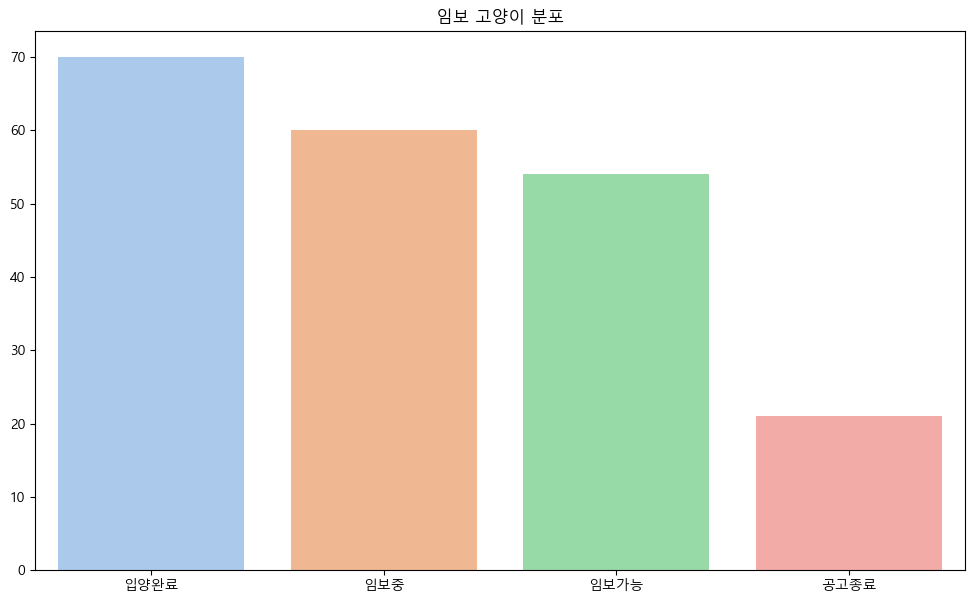

In [7]:
def classify_status(tag_list):
    if '공고종료' in tag_list:
        return '공고종료'
    elif '입양완료' in tag_list:
        return '입양완료'
    elif '임보중' in tag_list:
        return '임보중'
    else:
        return '임보가능'

cat_df['현재 상태'] = cat_df['tags'].apply(classify_status)

status_order = cat_df['현재 상태'].value_counts().sort_values(ascending=False).index.tolist()

plt.figure(figsize=(12, 7))
sns.countplot(data=cat_df, x='현재 상태',order=status_order,palette='pastel')
plt.title('임보 고양이 분포')
plt.xlabel('')
plt.ylabel('')
plt.show()

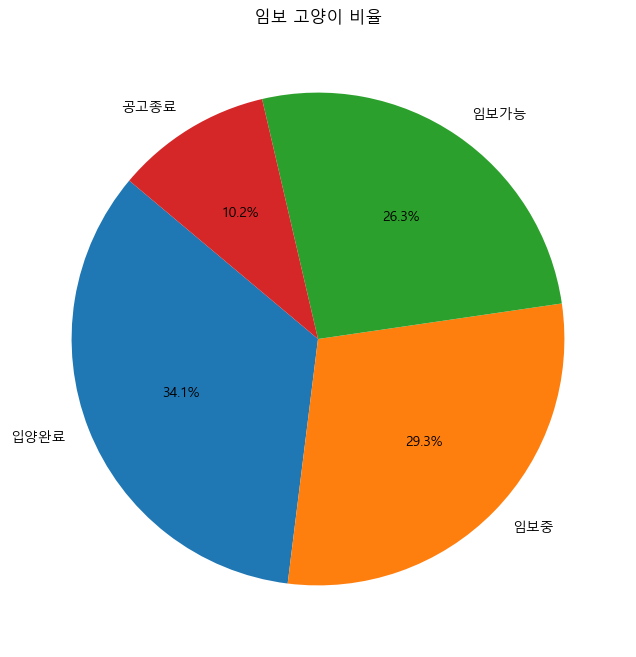

In [8]:
status_counts = cat_df['현재 상태'].value_counts()

labels = status_counts.index
sizes = status_counts.values

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('임보 고양이 비율')
plt.show()
